In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

pd.options.display.max_columns = None 

In [3]:
df = pd.read_pickle("../data/regresion_lineal/supermarket_4.pkl")
df.head(2)

,city,customer_type,gender,product_line,unit_price,quantity,date,time,payment,rating,month,shift,total_boxcox,city_Mandalay,city_Naypyitaw,city_Yangon,customer_type_Member,customer_type_Normal,gender_Female,gender_Male,product_line_Electronic accessories,product_line_Fashion accessories,product_line_Food and beverages,product_line_Health and beauty,product_line_Home and lifestyle,product_line_Sports and travel,payment_Cash,payment_Credit card,payment_Ewallet,month_February,month_January,month_March,shift_Afternoon,shift_Morning,quantity_num
0,Yangon,Member,Female,Health and beauty,0.431869,7,2019-01-05,13:08,Ewallet,0.700000,January,Morning,17.284419,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7
1,Naypyitaw,Normal,Female,Electronic accessories,-0.886596,5,2019-03-08,10:29,Cash,0.866667,March,Morning,8.608895,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5


In [4]:
# creamos un df con las variables predictoras y otro con la variable respuesta:

X = df.drop(["total_boxcox", "city", "customer_type", "gender", "product_line", "quantity", "date", "time", "payment", "month", "shift"], axis = 1)
y = df["total_boxcox"]

In [5]:
# hacemos las particiones de train - test para predecir

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
lr = LinearRegression(n_jobs=-1) # iniciamos la regresión lineal.
lr.fit(x_train, y_train)  # El modelo entrena.
y_predict_train = lr.predict(x_train) # hacemos las predicciones para el train.
y_predict_test = lr.predict(x_test) # hacemos las predicciones para el test.

In [7]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)

In [8]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
29,12.883742,13.909833,Train,-1.026091
535,10.140518,10.921580,Train,-0.781062
695,16.262577,15.817256,Train,0.445321
557,21.326539,21.965894,Train,-0.639355
836,12.205356,10.906284,Train,1.299072


C:\Users\anais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anais\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categori

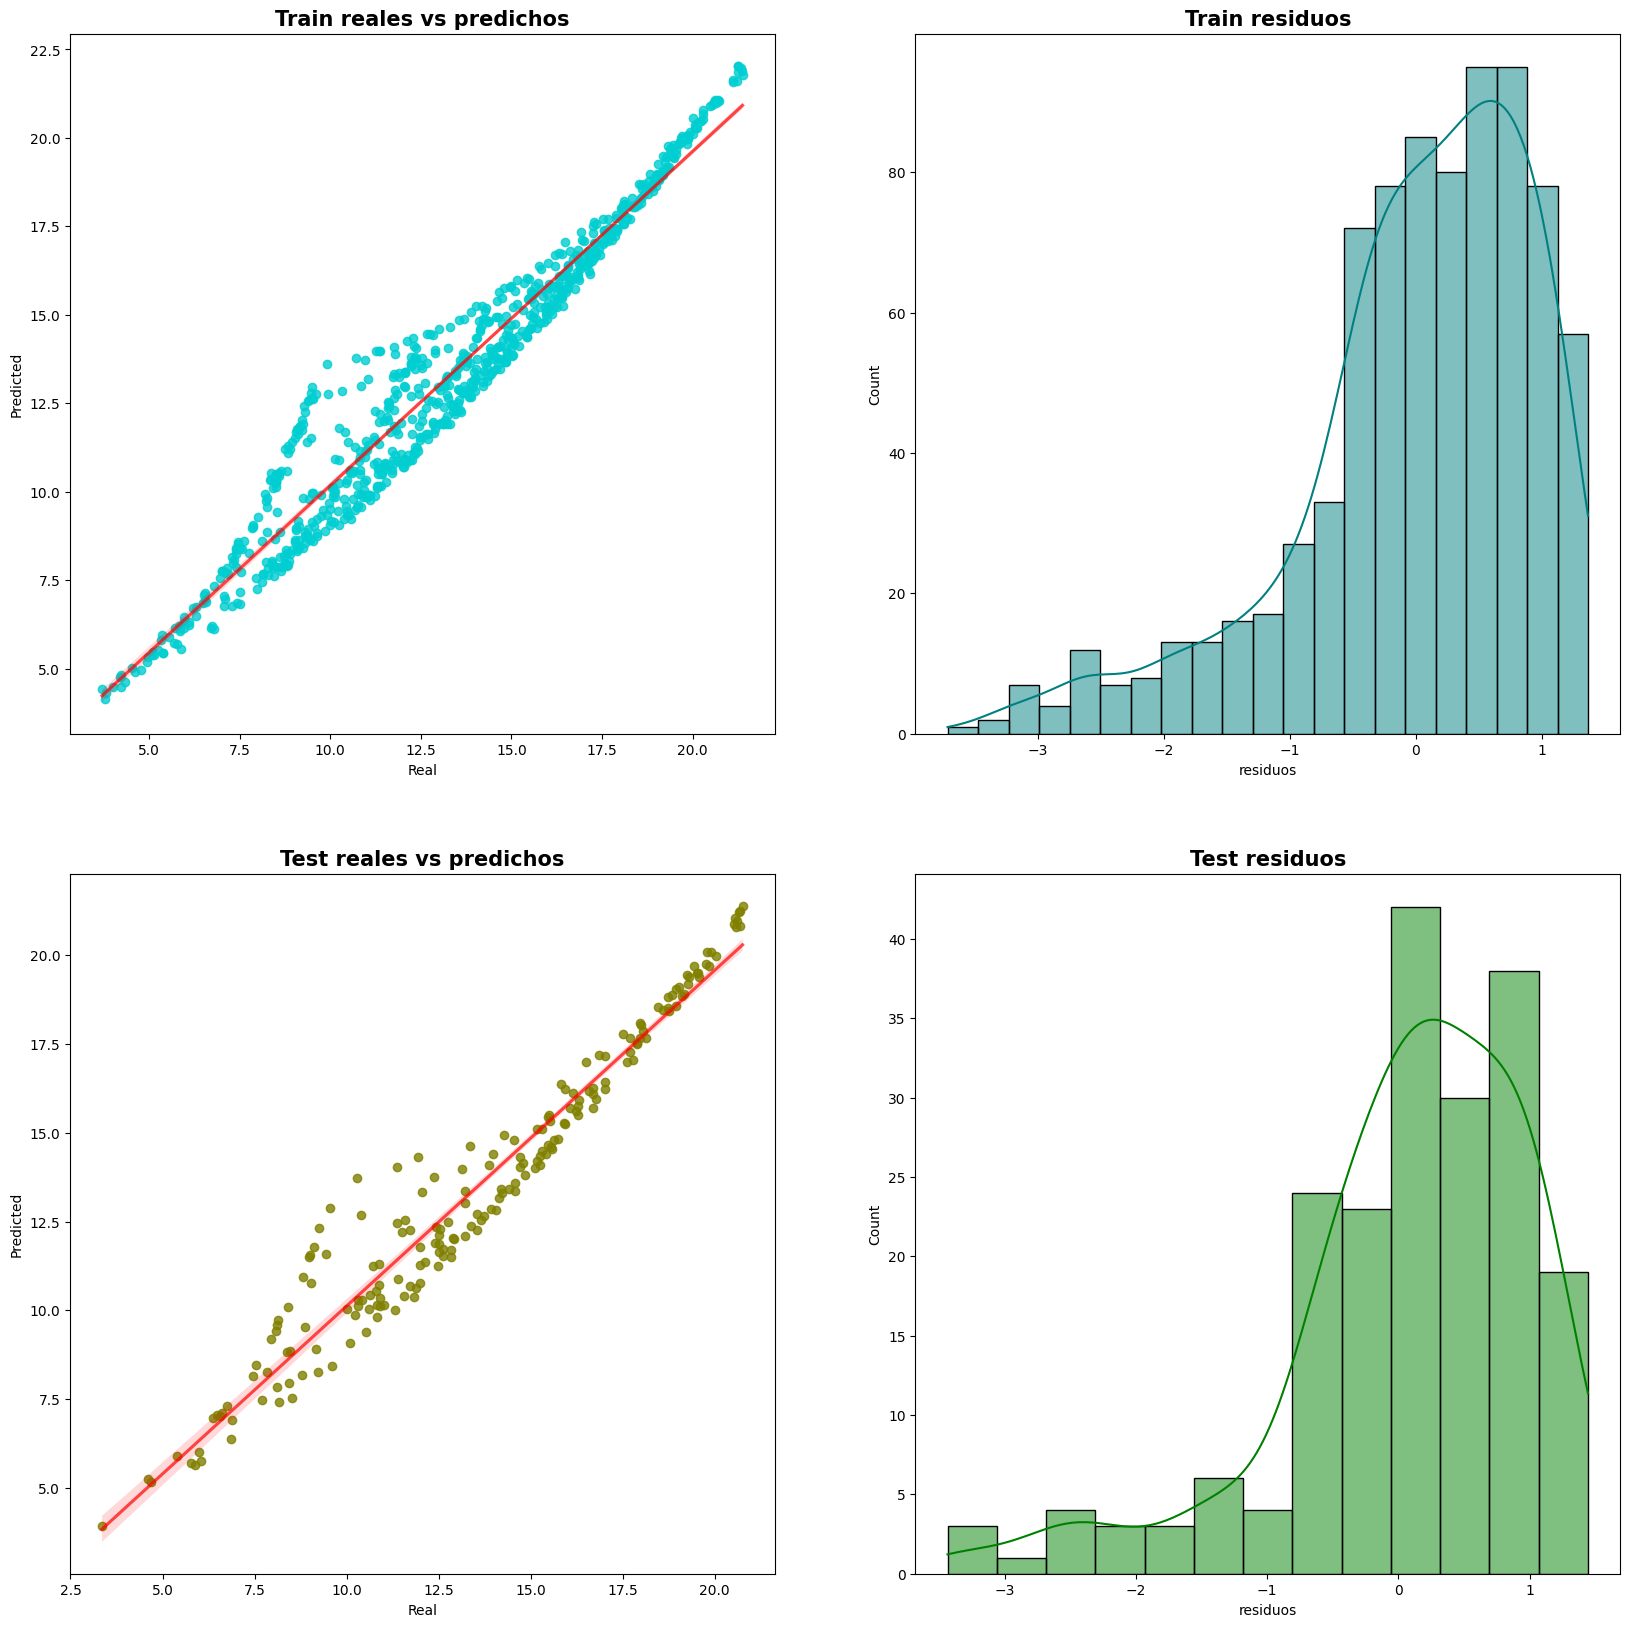

In [10]:
# sacamos gráficas sobre los valores reales vs los predichos


fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados[resultados['Set'] == "Train"],
            x = "Real",
            y = "Predicted",
            ax = ax[0,0],
            color = "darkturquoise",
            line_kws = {"color": "red", "alpha": 0.7 })
sns.regplot(data = resultados[resultados['Set'] == "Test"],
            x = "Real",
            y = "Predicted",
            color = "olive",
            line_kws = {"color": "red", "alpha": 0.7 },
            ax = ax[1,0])
# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
            x= "residuos",
            color ="teal",
            kde=True,
            ax = ax[0,1])
sns.histplot(resultados[resultados['Set'] == "Test"],
            x="residuos",
            color = "green",
            kde=True,
            ax = ax[1,1])
ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

Estos resultados no podemos considerarlos como fiables ya que nuestros datos no están normalizados.

### MÉTRICAS

In [ ]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))
# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.943353952542576
El MAE es 0.7370928495816546
El MSE es 0.9269985505280779
EL RMSE es  0.9628076394213321
Para el conjunto test:---------------
El valor de r2 score es  0.9483014418458322
El MAE es 0.7100369760251923
El MSE es 0.893493741987266
EL RMSE es  0.9452479790971605


In [ ]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                "set": ["test", "train"],
                "modelo": ["Linear Regresion", "LinearRegression"]}
df_resultados = pd.DataFrame(resultados_metricas)
df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.710037,0.893494,0.945248,0.948301,test,Linear Regresion
1,0.737093,0.926999,0.962808,0.943354,train,LinearRegression


Recordemos que nuestros datos no están normalizados y estos resultados no son fiables, pero vamos a analizarlos:

- Para que el modelo fuera bueno, tendrían que estar más cerca de 0 las métricas MAE, MSE y RMSE.

- El R2 sí sería bueno porque es alto, indica que nuestro modelo es capaz de explicar un 94% de los cambios en la variable respuesta.